Write a Python script that, when executed, detects any mentions of a particular keyword on Mastodon, Twitter, Gab, Parler, Truth Social, Telegram, or MeWe, or similar, and stores these to a report.

In [53]:
#install dependencies
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from time import sleep
import pandas as pd
import config #contains the chromedriver location, passwords, and username

In [46]:
# Create a Service object, passing the path to the chromedriver executable
service = Service(executable_path=config.CHROMELOC)

In [87]:
# Initialize the Chrome driver with the service I created above
driver = webdriver.Chrome(service=service)

In [88]:
driver.get('https://truthsocial.com/login')

In [89]:
# Locate the username element by the 'name' attribute
username_input = driver.find_element(By.NAME, 'username')

In [90]:
# Send keys to the located username element
username_input.send_keys(config.UNAME)

In [91]:
# Locate the password element 
password_input = driver.find_element(By.NAME, 'password')

In [92]:
# Send keys to the located element
password_input.send_keys(config.PASSWORD)

In [93]:
# Locate the sign-in button 
sign_in_button = driver.find_element(By.XPATH, "//button[span='Sign in']")

# Click the located button
sign_in_button.click()

<html lang="en" class="h-full" data-react-helmet="lang,class"><head><meta charset="utf-8"><meta name="viewport" content="width=device-width,initial-scale=1,viewport-fit=cover,user-scalable=no"><meta name="mobile-web-app-capable" content="yes"><meta name="apple-mobile-web-app-capable" content="yes"><link href="/manifest.json" rel="manifest"><!--server-generated-meta--><link rel="icon" type="image/png" href=""><!-- Icons --><link href="/icons/icon-57x57.png" rel="apple-touch-icon" sizes="57x57"><link href="/icons/icon-64x64.png" rel="apple-touch-icon" sizes="64x64"><link href="/icons/icon-72x72.png" rel="apple-touch-icon" sizes="72x72"><link href="/icons/icon-114x114.png" rel="apple-touch-icon" sizes="114x114"><link href="/icons/icon-120x120.png" rel="apple-touch-icon" sizes="120x120"><link href="/icons/icon-180x180.png" rel="apple-touch-icon" sizes="180x180"><link href="/icons/icon-192x192.png" rel="apple-touch-icon" sizes="192x192"><link href="/icons/icon-512x512.png" rel="apple-touch-
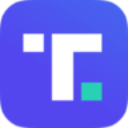

In [99]:
pagesource = driver.page_source
print(pagesource)

In [100]:
#save screenshot of image
driver.save_screenshot('screenshot.png')

True

In [107]:
# Use WebDriverWait to wait for the paragraph elements to be loaded
try:
    # Adjust the CSS selector to the elements p that has the text
    paragraphs = WebDriverWait(driver, 10).until(
        EC.presence_of_all_elements_located((By.CSS_SELECTOR, 'p[data-markup="true"]'))
    )

    # Loop through the located paragraph elements and search for mentions
    for paragraph in paragraphs:
        paragraph_text = paragraph.text
        if "Biden" in paragraph_text:
            print("Mention of 'Biden' found: ", paragraph_text)
        else:
            print("No mention of 'Biden' found in this paragraph.")
            
except Exception as e:
    print("An error occurred:", e)

An error occurred: Message: 

